<a href="https://colab.research.google.com/github/rulomak/Limpieza_datos_Pandas/blob/main/Limpieza%2Bde%2Bdatos%2Bcon%2BPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Vincular disco
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Revision al Dataset

In [4]:
# leer archivo csv
df_netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')

In [5]:
# tipo de dato
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
# forma del dataframe
df_netflix.shape   

(8807, 12)

## Identificar Data Faltante

In [7]:
# numero de filas faltantes en cada columna
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [8]:
# % de filas faltantes en cada columna

for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean()  
    print(column + ': ' + str(round(percentage*100, 2)))

show_id: 0.0
type: 0.0
title: 0.0
director: 29.91
cast: 9.37
country: 9.44
date_added: 0.11
release_year: 0.0
rating: 0.05
duration: 0.03
listed_in: 0.0
description: 0.0


# Manejo de Data Faltante

In [12]:
# eliminar fila con valores null
df_netflix = df_netflix[~(df_netflix['director'].isnull())]


In [14]:
for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean()  
    print(column + ': ' + str(round(percentage*100, 2)))

show_id: 0.0
type: 0.0
title: 0.0
director: 0.0
cast: 7.66
country: 6.84
date_added: 0.0
release_year: 0.0
rating: 0.02
duration: 0.05
listed_in: 0.0
description: 0.0


In [20]:
# reemplazar por numero arbitrario con .fillna()
df_netflix['duration'].fillna('0', inplace=True)

In [21]:
# extraer data de columna "duration" 
df_movie = df_netflix[df_netflix['type']=='Movie']

df_movie['minute'] = df_movie['duration'].str.split(expand=True)[0].astype(int)

<ipython-input-21-18b3d01a8ab1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minute'] = df_movie['duration'].str.split(expand=True)[0].astype(int)


In [22]:
df_movie.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
minute           int64
dtype: object

In [23]:
#se Extrae el tado anio
df_netflix['date_added'].str.extract('(\d{4})') 

,0
0,2021
2,2021
5,2021
6,2021
7,2021
...,...
8801,2016
8802,2019
8804,2019
8805,2020


# Identificar Valores Atipicos

## Usar histograma para identificar valores atipicos dentro de data numerica

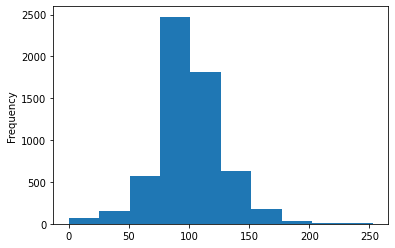

In [24]:
df_movie['minute'].plot(kind='hist', bins=10)

In [25]:
# obtener rangos de las barras con el metodo value_counts y el numero de bins
df_movie['minute'].value_counts(bins=10).sort_index()

(-0.254, 25.3]      72
(25.3, 50.6]       157
(50.6, 75.9]       567
(75.9, 101.2]     2475
(101.2, 126.5]    1813
(126.5, 151.8]     631
(151.8, 177.1]     178
(177.1, 202.4]      34
(202.4, 227.7]      10
(227.7, 253.0]       6
Name: minute, dtype: int64

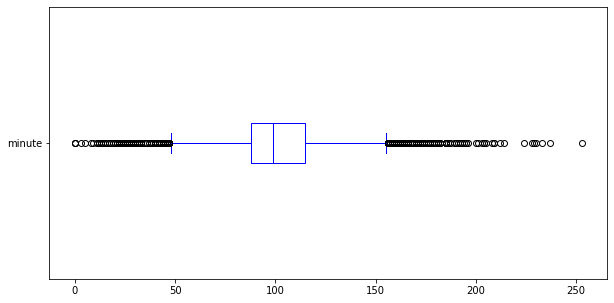

In [27]:
# hacer boxplot con pandas
df_movie['minute'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

In [28]:
# revision a valores estadisticos
# IQR = Q3-Q1
min_boxplot = 87 - 1.5*(114-87)   
max_boxplot = 114 + 1.5*(114-87)  

print(min_boxplot)
print(max_boxplot)
# df_movie['minute'].describe()

46.5
154.5


In [45]:
# manejar valores atipicos
df_movie[(df_movie['minute']>46.5) & (df_movie['minute']<154.5)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,120
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


# Usar grafico de barras para identificar valores atipicos dentro de data categorica

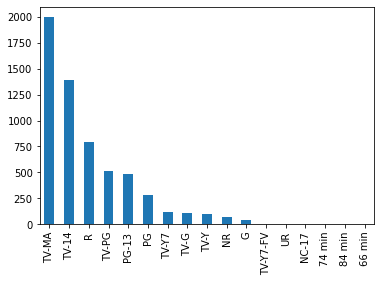

In [30]:
# hacer barplot con pandas
df_movie['rating'].value_counts().plot(kind='bar')

In [43]:
df_movie['rating'].value_counts()

TV-MA       1993
TV-14       1393
R            794
TV-PG        517
PG-13        489
PG           286
TV-Y7        123
TV-G         114
TV-Y         105
NR            75
G             41
TV-Y7-FV       4
UR             3
NC-17          2
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64